In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import healpy as hp

In [62]:
import glob

In [20]:
kboltz=1.3806503e-23 #MKS
clight=299792458.0 #MKS
hplanck=6.626068e-34 #MKS
TCMB = 2.72548 #Kelvin

In [13]:
d2r = np.pi / 180.
lonc = 107.2
latc = 5.2
lonra = [lonc-1.5, lonc+1.5]
latra = [latc-1.5, latc+1.5]

In [65]:
wmaps = glob.glob('/home/mabitbol/GBT-S140/externaldata/wmap_band_iqumap_r9_*.fits')

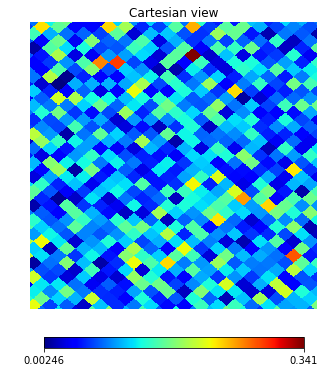

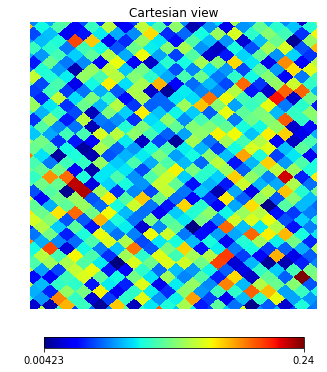

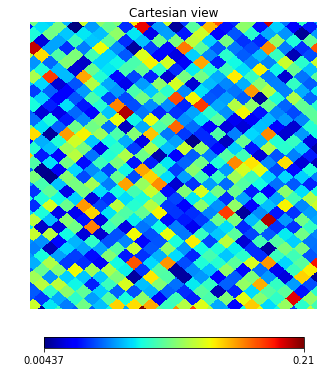

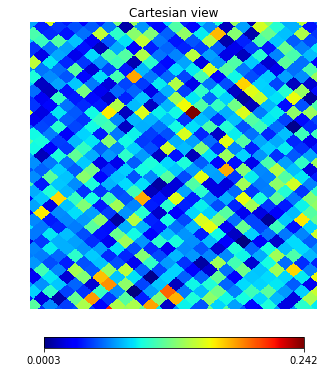

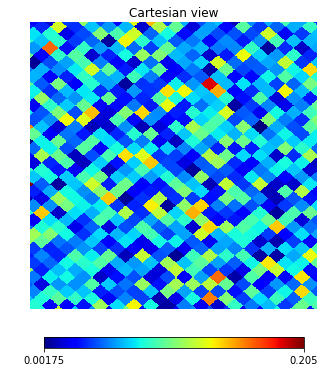

In [69]:
for wmap in wmaps:
    I, Q, U = hp.read_map(wmap, field=(0, 1, 2), verbose=False)
    P = np.sqrt(Q*Q + U*U)
    figure()
    hp.cartview(P, lonra=lonra, latra=latra, flip='geo')

In [70]:
plancks = glob.glob('/home/mabitbol/GBT-S140/externaldata/LFI_SkyMap_0*BPass*')

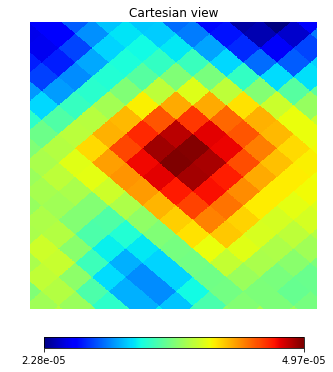

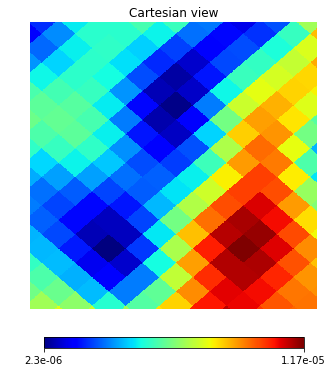

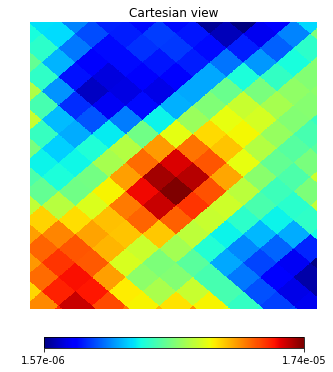

In [73]:
for planck in plancks:
    I, Q, U = hp.read_map(planck, field=(0, 1, 2), verbose=False)
    P = np.sqrt(Q*Q + U*U)
    figure()
    hp.cartview(P, lonra=lonra, latra=latra, flip='geo')

In [82]:
plancks = glob.glob('/home/mabitbol/GBT-S140/externaldata/LFI_SkyMap_0[3,4,7][0,4]-field*')

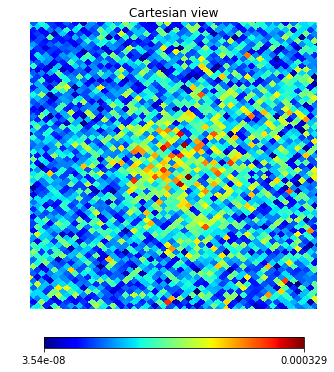

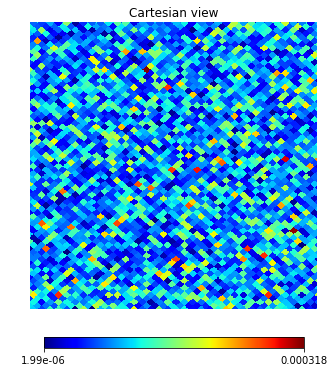

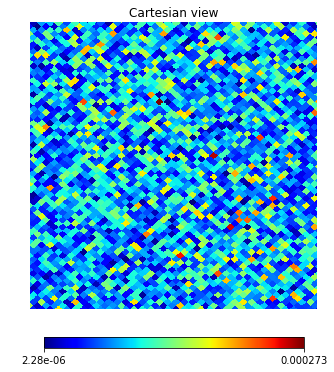

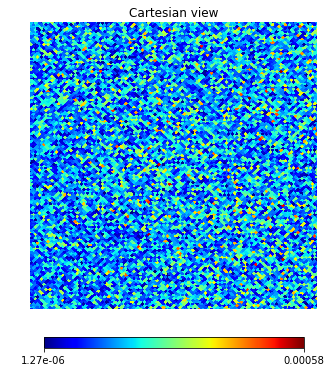

In [84]:
for planck in plancks:
    I, Q, U = hp.read_map(planck, field=(0, 1, 2), verbose=False)
    P = np.sqrt(Q*Q + U*U)
    figure()
    hp.cartview(P, lonra=lonra, latra=latra, flip='geo')

In [85]:
xmap = '/home/mabitbol/GBT-S140/externaldata/LFI_SkyMap_030-field-IQU_1024_R2.01_full.fits'
I, Q, U = hp.read_map(xmap, field=(0, 1, 2))

NSIDE = 1024
ORDERING = NESTED in fits file
Ordering converted to RING
Ordering converted to RING
Ordering converted to RING


In [87]:
P = np.sqrt(Q*Q + U*U)
P = hp.smoothing(P, fwhm=0.5*d2r)

Sigma is 12.739827 arcmin (0.003706 rad) 
-> fwhm is 30.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


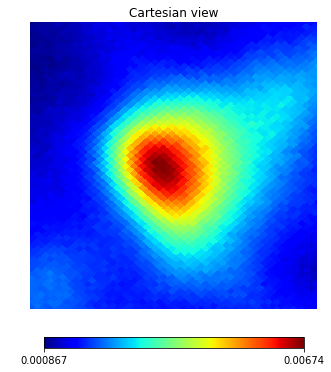

In [88]:
hp.cartview(I, lonra=lonra, latra=latra, flip='geo')

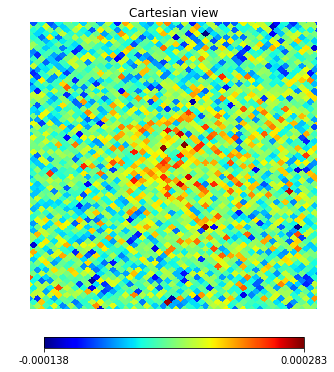

In [89]:
hp.cartview(Q, lonra=lonra, latra=latra, flip='geo')

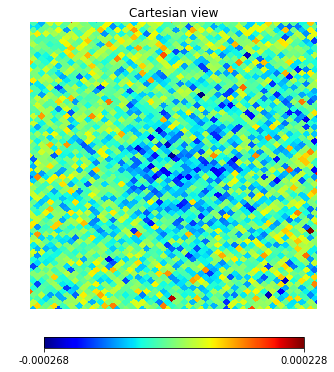

In [90]:
hp.cartview(U, lonra=lonra, latra=latra, flip='geo')

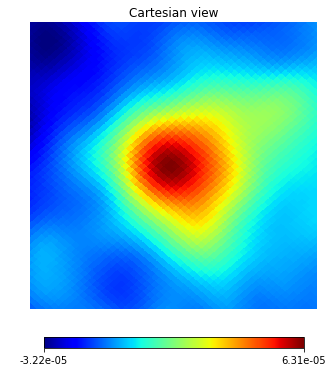

In [91]:
hp.cartview(P, lonra=lonra, latra=latra, flip='geo')

In [42]:
nu = 44.e9
nside = hp.get_nside(P)
vecc = hp.rotator.dir2vec(lonc, latc, lonlat=True)
rmask = hp.query_disc(nside, vecc, (60./60.)*d2r)
amaskout = set(hp.query_disc(nside, vecc, (90./60.)*d2r))
amaskin = set(hp.query_disc(nside, vecc, (60./60.)*d2r))
amask = np.array(list(amaskout.difference(amaskin)))
X = hplanck * nu / (kboltz * TCMB)
kthermo_to_intensity = 2. * kboltz * (nu / clight)**2 * (X**2 * np.exp(X)) / (np.exp(X) - 1.)**2
xdata = P * kthermo_to_intensity * hp.nside2pixarea(nside) * 1.e26
xdata -= np.median(xdata[amask])
print np.sum(xdata[rmask])

0.38587958935


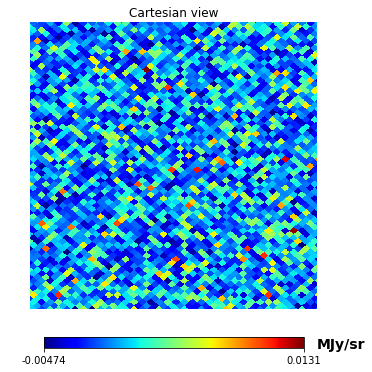

In [43]:
Punit = P * kthermo_to_intensity * 1.e20
Punit -= np.median(Punit[amask])
hp.cartview(Punit, lonra=lonra, latra=latra, flip='geo', unit='MJy/sr')

In [ ]:
0.75 / 